In [0]:
import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import load_breast_cancer

**Wisconsin breast cancer dataset from sklearn pacakge**


The breast cancer dataset is a classic and very easy binary classification dataset

In [0]:
#make dataFrame that the data will be in a table
df = pd.DataFrame( load_breast_cancer().data,columns=load_breast_cancer().feature_names)

In [0]:
#pick the five first rows in the the df
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
#check if there might be some null 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

**the dtype of the variable are all float**

We need to do some scaling to data that the cluster will be informative with StandardScaler



In [0]:
df_scale =  StandardScaler().fit_transform(df)

In [0]:
k_means = cluster.KMeans(n_clusters=2, random_state=42)
k_means.fit(df_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [0]:
y_means = k_means.predict(df_scale)

Accuracy classification score by **sklearn.metrics.accuracy_score**

he set of labels predicted for a sample must exactly match the corresponding set of labels in y_true

In [0]:
metrics.accuracy_score(load_breast_cancer().target, k_means.labels_)

0.9050966608084359

**metrics.classification_report** --> Build a text report showing the main classification metrics

In [0]:
print(metrics.classification_report(load_breast_cancer().target, k_means.labels_))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       212
           1       0.90      0.95      0.93       357

    accuracy                           0.91       569
   macro avg       0.91      0.89      0.90       569
weighted avg       0.91      0.91      0.90       569



In [59]:
x = df_scale[:, [0,1,2,3,4,5,6,7,8,9,10]]
x

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00, ...,
         2.21751501e+00,  2.25574689e+00,  2.48973393e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00, ...,
         1.39236330e-03, -8.68652457e-01,  4.99254601e-01],
       [ 1.57988811e+00,  4.56186952e-01,  1.56650313e+00, ...,
         9.39684817e-01, -3.98007910e-01,  1.22867595e+00],
       ...,
       [ 7.02284249e-01,  2.04557380e+00,  6.72675785e-01, ...,
        -8.09117071e-01, -8.95586935e-01,  1.84892408e-01],
       [ 1.83834103e+00,  2.33645719e+00,  1.98252415e+00, ...,
         2.13719425e+00,  1.04369542e+00,  1.15793543e+00],
       [-1.80840125e+00,  1.22179204e+00, -1.81438851e+00, ...,
        -8.20069901e-01, -5.61032377e-01, -7.02787405e-02]])

we can see that the f1score cross with the accuarcy we get 91%

so what is f1score??

# **f1score**:

first we need to understand some equations -> like Precision and Recall

https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Faccuracy-precision-recall-or-f1-331fb37c5cb9&psig=AOvVaw0xcLdNnNv1aR0zr3Ivkw7M&ust=1588599674368000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCIj50o7pl-kCFQAAAAAdAAAAABAD

**f1**: is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score: p is the number of correct positive results divided by the number of all positive results returned by the classifier, and r is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive)





# **cluster of mean radius vs mean texture**

Text(0.5, 1.0, 'Clutster visual')

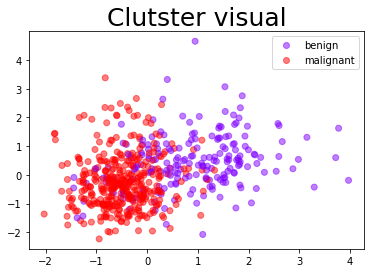

In [60]:
fig, ax = plt.subplots()
scatter =ax.scatter(x[:,0],x[:,1],c=y_means,cmap="rainbow",alpha=0.5)
ax.legend(handles=scatter.legend_elements()[0], labels=['benign','malignant'])
plt.title("Clutster visual",fontsize=25)

# **cluster of mean texture vs mean perimeter**

Text(0.5, 1.0, 'Clutster visual')

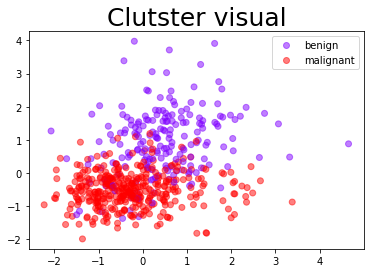

In [61]:
fig, ax = plt.subplots()
scatter =ax.scatter(x[:,1],x[:,2],c=y_means,cmap="rainbow",alpha=0.5)
ax.legend(handles=scatter.legend_elements()[0], labels=['benign','malignant'])
plt.title("Clutster visual",fontsize=25)

# **cluster of mean perimeter vs mean area**

Text(0.5, 1.0, 'Clutster visual')

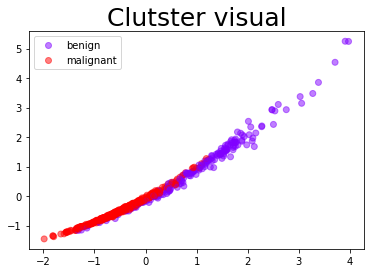

In [54]:
fig, ax = plt.subplots()
scatter =ax.scatter(x[:,2],x[:,3],c=y_means
,cmap="rainbow",alpha=0.5)
ax.legend(handles=scatter.legend_elements()[0], labels=['benign','malignant'])
plt.title("Clutster visual",fontsize=25)

Text(0.5, 1.0, 'Clutster visual')

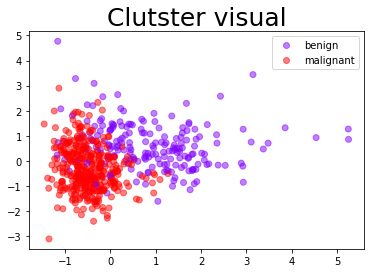

In [62]:
fig, ax = plt.subplots()
scatter =ax.scatter(x[:,3],x[:,4],c=y_means
,cmap="rainbow",alpha=0.5)
ax.legend(handles=scatter.legend_elements()[0], labels=['benign','malignant'])
plt.title("Clutster visual",fontsize=25)

Text(0.5, 1.0, 'Clutster visual')

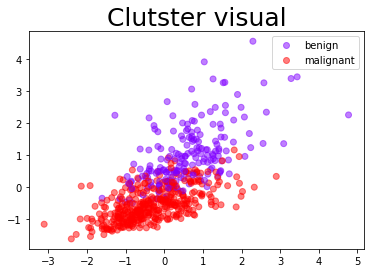

In [63]:
fig, ax = plt.subplots()
scatter =ax.scatter(x[:,4],x[:,5],c=y_means
,cmap="rainbow",alpha=0.5)
ax.legend(handles=scatter.legend_elements()[0], labels=['benign','malignant'])
plt.title("Clutster visual",fontsize=25)

Text(0.5, 1.0, 'Clutster visual')

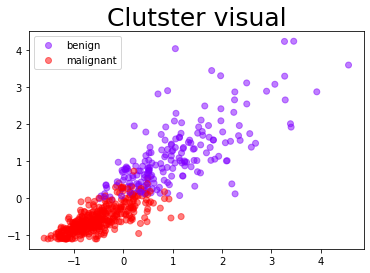

In [64]:
fig, ax = plt.subplots()
scatter =ax.scatter(x[:,5],x[:,6],c=y_means
,cmap="rainbow",alpha=0.5)
ax.legend(handles=scatter.legend_elements()[0], labels=['benign','malignant'])
plt.title("Clutster visual",fontsize=25)